# **COMP1016 Group Project Part B**

# IT Salary Section

## Download all necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

## Clean the dataset

In [3]:
df = pd.read_csv('IT_Salary.csv')

In [79]:
df.head()

,Age,Gender,City,Seniority level,Position,Total years of experience,Yearly salary,Number of vacation days,Main language at work,Company type,Contract,Year
0,21,Male,Nizhny Novgorod,Junior,Mobile Developer,1.0,6000.0,30.0,Russian,Outsource,Temporary contract,2019
1,27,Male,Hamburg,Middle,Backend Developer,3.0,10001.0,24.0,English,Consulting / Agency,Temporary contract,2020
2,22,Male,Istanbul,Middle,Backend Developer,3.0,10001.0,0.0,English,Startup,unlimited,2020
3,24,Male,Aachen,Junior,HiWi,3.0,10164.0,14.0,English,University,Temporary contract,2020
4,27,Male,Bucharest,Junior,QA Engineer,1.0,11000.0,24.0,English,Others,unlimited,2020


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2233 non-null   int64  
 1   Gender                     2233 non-null   object 
 2   City                       2233 non-null   object 
 3   Seniority level            2233 non-null   object 
 4   Position                   2233 non-null   object 
 5   Total years of experience  2233 non-null   float64
 6   Yearly salary              2233 non-null   float64
 7   Number of vacation days    2233 non-null   float64
 8   Main language at work      2233 non-null   object 
 9   Company type               2233 non-null   object 
 10  Contract                   2233 non-null   object 
 11  Year                       2233 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 209.5+ KB


#### We see that there is no Nan values in the dataset

#### Let's analyze numeric data

In [81]:
df.describe()

,Age,Total years of experience,Yearly salary,Number of vacation days,Year
count,2233.000000,2233.000000,2.233000e+03,2233.000000,2233.000000
mean,32.211375,8.662830,2.959668e+05,28.859158,2019.557546
std,5.542449,5.215855,1.057949e+07,19.345078,0.496789
min,18.000000,0.000000,6.000000e+03,0.000000,2019.000000
25%,28.000000,5.000000,6.000000e+04,25.500000,2019.000000
50%,32.000000,8.000000,7.000000e+04,28.000000,2020.000000
75%,35.000000,12.000000,8.000000e+04,30.000000,2020.000000
max,69.000000,40.000000,5.000000e+08,365.000000,2020.000000


#### We see that the maximum salary is 500 000 000, and the maximum no of vacation days is 365, they are outliers. So, we need to delete them

In [82]:
s = df['Yearly salary']
print(f'Yearly salary column mean {np.mean(s):.2f}')
print(f'Yearly salary column mean, excluding 10% from both tails {stats.trim_mean(s, 0.1):.2f}')

Yearly salary column mean 295966.79
Yearly salary column mean, excluding 10% from both tails 69825.52


#### We see that outliers have significant impact. We need to delete them

In [4]:
lower_quartile = df['Yearly salary'].quantile(0.25)
upper_quartile = df['Yearly salary'].quantile(0.75)
IQR = upper_quartile - lower_quartile
lower_boundary = lower_quartile - IQR * 1.5
upper_boundary = upper_quartile + IQR * 1.5

outliers = df[(df['Yearly salary'] < lower_boundary) | (df['Yearly salary'] > upper_boundary)]
df = df.drop(outliers.index)

In [5]:
lower_quartile = df['Number of vacation days'].quantile(0.25)
upper_quartile = df['Number of vacation days'].quantile(0.75)
IQR = upper_quartile - lower_quartile
lower_boundary = lower_quartile - IQR * 1.5
upper_boundary = upper_quartile + IQR * 1.5

outliers = df[(df['Number of vacation days'] < lower_boundary) | (df['Number of vacation days'] > upper_boundary)]
df = df.drop(outliers.index)

In [85]:
x = df['Yearly salary']
print(f'Yearly salary column mean {np.mean(x):.2f}')
print(f'Yearly salary column mean, excluding 10% from both tails {stats.trim_mean(x, 0.1):.2f}')

Yearly salary column mean 69137.56
Yearly salary column mean, excluding 10% from both tails 68761.40


#### We delete all outliers in Yearly salary column. Mean and trimmed mean are almost equal, this means that there are no outliers.

#### Let's analyze categorical data

In [86]:
df.describe(include='object')

,Gender,City,Seniority level,Position,Main language at work,Company type,Contract
count,2036,2036,2036,2036,2036,2036,2036
unique,2,129,15,156,16,54,2
top,Male,Berlin,Senior,Backend Developer,English,Product,unlimited
freq,1710,1038,1074,400,1648,1278,1901


#### We see that Seniority level column contains 15 unique values. However, in IT industry uses only 5 levels of seniority: Junior, Middle, Senior, Lead and Head. 

In [91]:
df['Seniority level'].value_counts()

Seniority level
Senior                                       1074
Middle                                        611
Lead                                          164
Junior                                        137
Head                                           37
Principal                                       4
Intern                                          1
No level                                        1
Entry level                                     1
No level                                        1
Work Center Manager                             1
no idea, there are no ranges in the firm        1
Manager                                         1
VP                                              1
Director                                        1
Name: count, dtype: int64

#### We can conclude that 99.3% of data Seniority level column is distributed among 5 grades: Junior, Middle, Senior, Lead and Head. This means that we can delete another levels. This means that we can safely remove the remaining levels, as they represent only a very small fraction of the data and are unlikely to significantly impact the analysis.

In [6]:
valid_levels = ['Junior', 'Middle', 'Senior', 'Lead', 'Head']

df = df[df['Seniority level'].isin(valid_levels)]
df = df.reset_index(drop=True)

#### Let's check if there are duplicates in the dataset

In [93]:
df.duplicated().sum() 

22

#### We found out that there are 22 duplicates. So, we need to delete them.

In [7]:
df = df.drop_duplicates()

#### Our data is cleaned. So, we can work on our questions.

## Question 1

### Part A

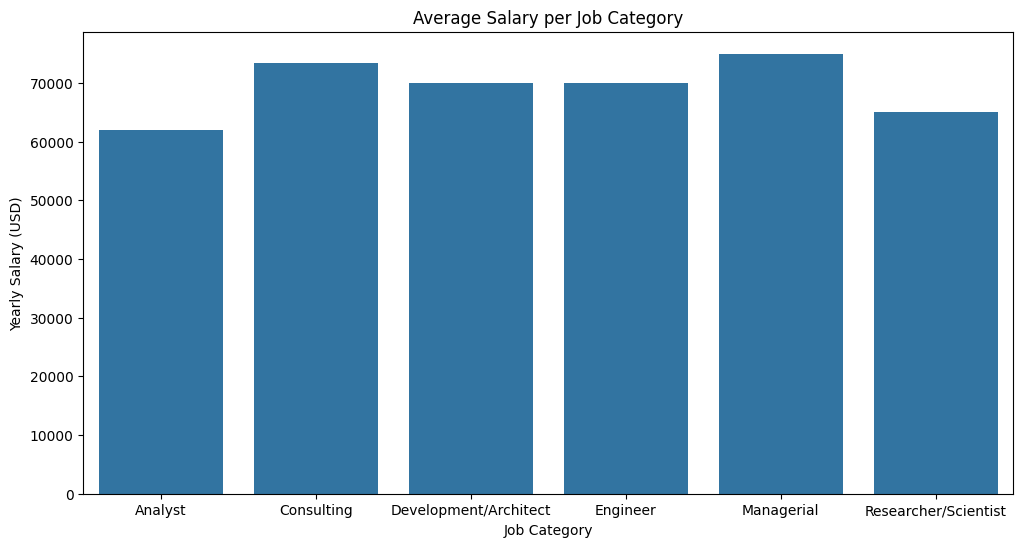

In [95]:
unique_positions = df['Position '].unique()
unique_df = pd.DataFrame(unique_positions, columns=['Unique Positions'])

# Initialize a new column 'Category' with a default value
df['Category'] = 'Other'

# Define conditions for categorizing positions
managerial = df['Position '].str.contains('manager|head|leader|team|lead|cto', case=False, na=False)
engineer = df['Position '].str.contains('engineer|eng\\.|eng', case=False, na=False)
analyst = df['Position '].str.contains('analy|qa', case=False, na=False)
researcher = df['Position '].str.contains('researcher|scientist', case=False, na=False)
development = df['Position '].str.contains('architect|developer|dev', case=False, na=False)
consulting = df['Position '].str.contains('consult|consultant', case=False, na=False)

# Assign categories based on pattern matching
df.loc[managerial, 'Category'] = 'Managerial'
df.loc[engineer, 'Category'] = 'Engineer'
df.loc[analyst, 'Category'] = 'Analyst'
df.loc[researcher, 'Category'] = 'Researcher/Scientist'
df.loc[development, 'Category'] = 'Development/Architect'
df.loc[consulting, 'Category'] = 'Consulting'

df_categorized = df[df['Category'] != 'Other'].copy()
salary_summary = df_categorized.pivot_table(
    index='Category', 
    values='Yearly salary', 
    aggfunc='median'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=salary_summary, x='Category', y='Yearly salary')
plt.title('Average Salary per Job Category')
plt.xlabel('Job Category')
plt.ylabel('Yearly Salary (USD)')
plt.show()

#### After categorising the different positions into job categories based on their roles in their work such as managerial positions and developer positions, the average salary for positions in each category was calculated based on the median and compared in the bar chart. Based on the bar chart, it seems that Consulting and Managerial positions have the highest average salary at 80000 and around 77000 respectively. On the other hand, the analyst positions seem to have the lowest average salary at around 61000. While the difference in the lowest average salary is about 23.75% less than the highest average salary, the remaining other categories are mostly similar around 70000.

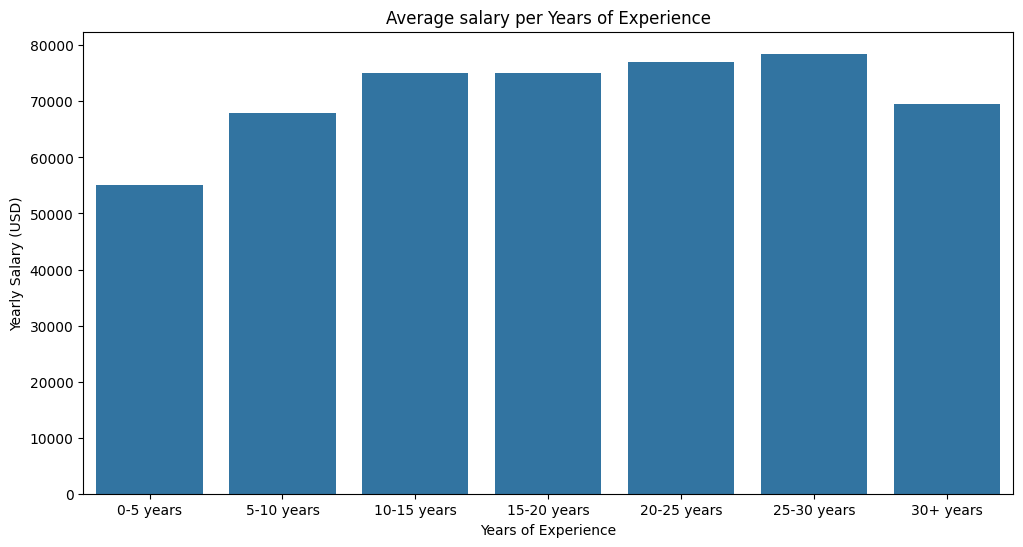

In [98]:
bin_edges = [0, 5, 10, 15, 20, 25, 30, 70]
bin_labels = [
    '0-5 years', '5-10 years', '10-15 years', 
    '15-20 years', '20-25 years', '25-30 years', 
    '30+ years'
]

df['Experience Category'] = pd.cut(
    df['Total years of experience'], 
    bins=bin_edges,
    labels=bin_labels,
    right=False
)

summary1 = df.pivot_table(
    index=['Experience Category'], 
    values=['Yearly salary'], 
    aggfunc='median'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=summary1, x='Experience Category', y='Yearly salary')
plt.title('Average salary per Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Yearly Salary (USD)')
plt.show()

#### For the average salary based on years of experience, the data was grouped in 5 year intervals. From the graph, we can see that average salary increases significantly from 0 to 25 years of experience, before peaking and subsequently decreasing slightly from 25 years of experience onwards. This would mean that the average salary is highest for people with around 15 to 25 years of experience, while people with less than 5 years of experience have the lowest average salaries.

### Part B

In [101]:
berlin_salaries = df[df['City'] == 'Berlin']['Yearly salary']
non_berlin_salaries = df[df['City'] != 'Berlin']['Yearly salary']

# Print variances to find out if variances are equal
print("Berlin var:", np.var(berlin_salaries, ddof=1))
print("Non-Berlin var:", np.var(non_berlin_salaries, ddof=1))

statistic, p_value = ttest_ind(
    berlin_salaries,
    non_berlin_salaries,
    equal_var = True,
    alternative = 'greater'
)

print("p-value:", p_value)
print("t-statistic:", statistic)

alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis: There is sufficient evidence to show that',
    'the average IT salary in Berlin is higher than in other cities.')
else:
    print('Fail to reject null hypothesis: There is insufficient evidence to conclude that',
          'the average IT salary in Berlin is higher than in other cities.')

Berlin var: 211726953.7683506
Non-Berlin var: 271017604.1118857
p-value: 0.0005803645318359902
t-statistic: 3.25305762859963
Reject null hypothesis: There is sufficient evidence to show that the average IT salary in Berlin is higher than in other cities.


#### Based on the hypothesis testing carried out, the null hypothesis was not rejected. This would mean there is insufficient evidence to show that the average IT salary in Berlin is higher than that of other cities. As such, we would not conclude that there are any significant differences in average salaries.

## Question 2

### The objective of this research is to find out whether conditions for men is better than for women in IT industry

#### Firstly, let's make a correlation matrix to figure out any relationships

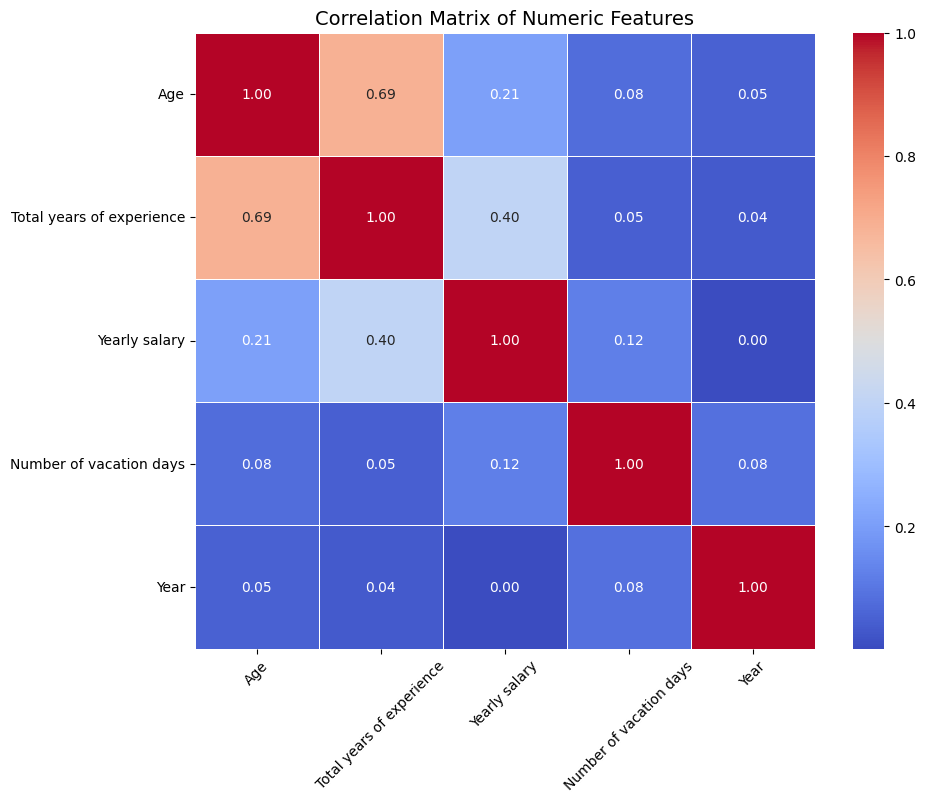

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### We can see that Experience is the main driver of salary, not age or year; Vacation days appear to be assigned uniformly, regardless of age, salary, or experience; No observable trends across different years.

#### Let's construct 95% confidence intervals for the age of each seniority level

In [9]:
levels = ['Junior', 'Middle', 'Senior', 'Lead', 'Head']

for level in levels:
    ages = df[df['Seniority level'] == level]['Age']
    
    mean = ages.mean()
    std = ages.std(ddof=1)
    n = len(ages)
    se = std / np.sqrt(n)
    
    confidence = 0.95
    t_score = stats.t.ppf((1 + confidence) / 2, df=n-1)
    margin_of_error = t_score * se
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    print(f"95% Confidence Interval for {level} Age: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval for Junior Age: (28.15, 29.88)
95% Confidence Interval for Middle Age: (30.07, 30.83)
95% Confidence Interval for Senior Age: (32.83, 33.47)
95% Confidence Interval for Lead Age: (33.36, 35.09)
95% Confidence Interval for Head Age: (34.29, 39.77)


#### There is a clear, gradual increase in average age as seniority level rises; Overlap between levels (eSenior and Lead, Lead and Head) suggests age isn't the only factor that matters; The wide interval for Head roles shows variability in how and when individuals reach top position.

#### Let's find out if men earn more than women

In [31]:
men = df[df['Gender'] == 'Male']['Yearly salary']
women = df[df['Gender'] == 'Female']['Yearly salary']

print('Men var:', np.var(men, ddof=1))
print('Women var:', np.var(women, ddof=1))

statistic, p_value = ttest_ind(
    men,
    women,
    equal_var = True,
    alternative = 'greater'
)

print("p-value:", p_value)
print("t-statistic:", statistic)

alpha = 0.05
if p_value < alpha:  
    print('Reject null hypothesis. Sufficient evidence to claim that alternative hypothesis is true.')
else:
    print('Fail to reject null hypothesis. Insufficient evidence to claim that alternative hypothesis is true.')

Men var: 237181207.72400665
Women var: 171717394.61351246
p-value: 9.308921516505574e-31
t-statistic: 11.663066352381035
Reject null hypothesis. Sufficient evidence to claim that alternative hypothesis is true.


#### This testing shows us that men earn more than women

#### Let's find out if the number of vacation days for men is higher than for women

In [11]:
men_vacations = df[df['Gender'] == 'Male']['Number of vacation days']
women_vacations = df[df['Gender'] == 'Female']['Number of vacation days']

# Print variances to find out if variances are equal
print("Vacations variance for males:", np.var(men_vacations, ddof=1))       
print("Vacations variance for females:", np.var(women_vacations, ddof=1))   

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(
    men_vacations,
    women_vacations,
    equal_var=False,
    alternative='less'
)

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:  
    print('Reject null hypothesis. Sufficient evidence to claim that alternative hypothesis is true.')
else:
    print('Fail to reject null hypothesis. Insufficient evidence to claim that alternative hypothesis is true.')

Vacations variance for males: 6.541914741626252
Vacations variance for females: 6.246105919003115
T-statistic: -0.8965620330998555
P-value: 0.1852121413099656
Fail to reject null hypothesis. Insufficient evidence to claim that alternative hypothesis is true.


#### This testing shows us that women have more vacation days than men

#### Let's plot a barplot showcasing the annual salary per seniority level

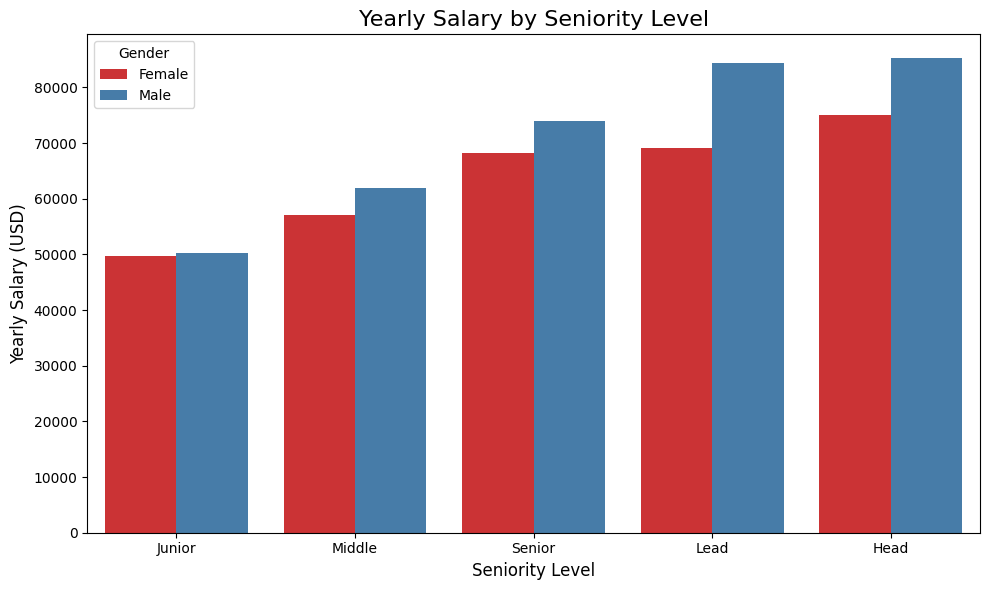

In [32]:
order = ['Junior', 'Middle', 'Senior', 'Lead', 'Head']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df, x='Seniority level', y='Yearly salary',
    palette='Set1', hue='Gender', order=order, errorbar=None
)
plt.title('Yearly Salary by Seniority Level', fontsize=16)
plt.xlabel('Seniority Level', fontsize=12)
plt.ylabel('Yearly Salary (USD)', fontsize=12)
plt.tight_layout()
plt.show()

#### We can observe that on each level of seniority men tend to earn more than women

#### Let's plot a barplot showcasing the annual salary per experience

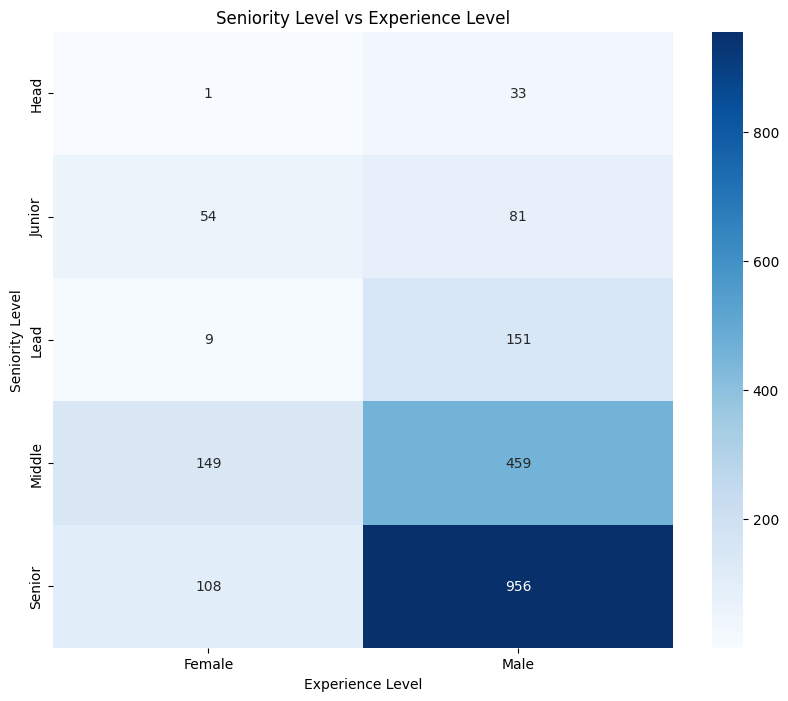

In [33]:
cross_tab = pd.crosstab(df['Seniority level'], df['Gender'])

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Seniority Level vs Experience Level')
plt.ylabel('Seniority Level')
plt.xlabel('Experience Level')
plt.show()

In [34]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-squared = {chi2:.2f}, p-value = {p:.29f}")

alpha = 0.05
if p_value < alpha:  
    print('Reject null hypothesis. Sufficient evidence to claim that alternative hypothesis is true.')
else:
    print('Fail to reject null hypothesis. Insufficient evidence to claim that alternative hypothesis is true.')

Chi-squared = 134.52, p-value = 0.00000000000000000000000000042
Reject null hypothesis. Sufficient evidence to claim that alternative hypothesis is true.


#### This testing shows us that the connection between seniority level and gender is statistically significant

# Stock Trading Strategy and Back Testing Section

## Download all necessary libraries

In [88]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### Question 3

In [89]:
ticker_symbols = [
    'DIS', 'SBUX', 'WMT', 'NFLX', 'MCD', 'JPM', 'BA', 'INTC', 'V',
    'PG', 'UNH', 'PEP', 'BAC', 'MRK', 'ABBV', 'HON', 'LIN', 'PM', 'C'
]

## Download 10 years of historical data using yfinance
def get_stock_data(ticker, period="10y"):
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data

## Calculate 50-day and 200-day moving averages
def calculate_moving_averages(data):
    data['MA50'] = data['Close'].rolling(window=50).mean()
    data['MA200'] = data['Close'].rolling(window=200).mean()
    return data

## Calculate Relative Strength Index (RSI) using 14-day window
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data

## Identify Golden Cross: MA50 crosses above MA200
def identify_golden_cross(data):
    data['GoldenCross'] = (data['MA50'] > data['MA200']) & (data['MA50'].shift(1) <= data['MA200'].shift(1))
    return data

## Identify Death Cross: MA50 crosses below MA200
def identify_death_cross(data):
    data['DeathCross'] = (data['MA50'] < data['MA200']) & (data['MA50'].shift(1) >= data['MA200'].shift(1))
    return data

## Implement trading strategy with buy/sell rules
def implement_strategy(data):
    positions = []
    data = data.iloc[200:].copy()  ## skip early rows with insufficient MA data
    buy_dates = data[(data['GoldenCross'] == True) & (data['RSI'] < 70)].index.tolist()  ## Buy only if RSI < 70

    for buy_date in buy_dates:
        buy_price = data.loc[buy_date, 'Close']
        target_price = buy_price * 1.15  ## Set 15% profit target
        max_sell_date = buy_date + pd.Timedelta(days=180)  ## Max holding period = 180 days
        sell_period = data.loc[buy_date:max_sell_date].copy()

        target_hit = sell_period[sell_period['Close'] >= target_price]
        death_crosses = sell_period[sell_period['DeathCross'] == True]

        ## Priority 1: Target profit hit
        if not target_hit.empty:
            sell_date = target_hit.index[0]
            sell_price = target_hit.loc[sell_date, 'Close']
            sell_reason = "Target reached"
        ## Priority 2: Death cross appears
        elif not death_crosses.empty:
            sell_date = death_crosses.index[0]
            sell_price = sell_period.loc[sell_date, 'Close']
            sell_reason = "Death cross"
        ## Priority 3: Max holding period expired
        else:
            sell_date_candidates = sell_period.index.tolist()
            if sell_date_candidates:
                sell_date = sell_date_candidates[-1]
                sell_price = data.loc[sell_date, 'Close']
                sell_reason = "Max holding period"
            else:
                continue

        holding_days = (sell_date - buy_date).days
        profit_pct = (sell_price / buy_price - 1) * 100
        profit_dollar = sell_price - buy_price

        positions.append({
            'BuyDate': buy_date,
            'BuyPrice': buy_price,
            'SellDate': sell_date,
            'SellPrice': sell_price,
            'HoldingDays': holding_days,
            'ProfitPct': profit_pct,
            'ProfitDollar': profit_dollar,
            'SellReason': sell_reason
        })

    return pd.DataFrame(positions)

## Analyze results for a given ticker
def analyze_results(positions, ticker):
    print(f"\n===== Trading Strategy Results for {ticker} (Golden + Death Cross + RSI) =====")
    if positions.empty:
        print("No trading signals detected")
        return positions

    total_trades = len(positions)
    win_trades = len(positions[positions['ProfitPct'] > 0])
    loss_trades = total_trades - win_trades
    win_rate = win_trades / total_trades * 100 if total_trades > 0 else 0

    avg_profit = positions['ProfitPct'].mean()
    avg_win = positions[positions['ProfitPct'] > 0]['ProfitPct'].mean() if win_trades > 0 else 0
    avg_loss = positions[positions['ProfitPct'] <= 0]['ProfitPct'].mean() if loss_trades > 0 else 0
    avg_holding = positions['HoldingDays'].mean()

    target_reached = len(positions[positions['SellReason'] == 'Target reached'])
    max_period = len(positions[positions['SellReason'] == 'Max holding period'])
    death_cross_sells = len(positions[positions['SellReason'] == 'Death cross'])

    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {win_trades} ({win_rate:.2f}%)")
    print(f"Losing Trades: {loss_trades}")
    print(f"Average Profit: {avg_profit:.2f}%")
    print(f"Sell Reasons: Target={target_reached}, DeathCross={death_cross_sells}, MaxHold={max_period}")

    return positions

## Plot buy/sell signals for a ticker
def plot_trading_signals(data, positions, ticker):
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='lightblue', alpha=0.6)
    plt.plot(data.index, data['MA50'], label='50-day MA', color='orange')
    plt.plot(data.index, data['MA200'], label='200-day MA', color='green')

    for _, row in positions.iterrows():
        buy_date = row['BuyDate']
        sell_date = row['SellDate']
        sell_reason = row['SellReason']

        plt.plot(buy_date, data.loc[buy_date, 'Close'], '^', markersize=10, color='green', label='Buy' if 'Buy' not in plt.gca().get_legend_handles_labels()[1] else "")
        color = {'Target reached': 'red', 'Death cross': 'purple', 'Max holding period': 'orange'}[sell_reason]
        label = f"Sell ({sell_reason})"
        plt.plot(sell_date, data.loc[sell_date, 'Close'], 'v', markersize=10, color=color,
                 label=label if label not in plt.gca().get_legend_handles_labels()[1] else "")

    plt.title(f"{ticker} Price with Buy/Sell Signals")
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Process a single ticker: apply indicators, strategy, analysis, and plot
def process_ticker(ticker):
    data = get_stock_data(ticker)
    data = calculate_moving_averages(data)
    data = calculate_rsi(data)
    data = identify_golden_cross(data)
    data = identify_death_cross(data)
    positions = implement_strategy(data)
    positions = analyze_results(positions, ticker)
    if not positions.empty:
        positions['Ticker'] = ticker
        plot_trading_signals(data, positions, ticker)
    return positions

def main():
    all_positions = pd.DataFrame()
    for ticker in ticker_symbols:
        positions = process_ticker(ticker)
        if not positions.empty:
            all_positions = pd.concat([all_positions, positions])

    if not all_positions.empty:
        all_positions.to_csv('all_trades.csv', index=False)

        print("\n===== Summary Across All Tickers =====")
        total_trades = len(all_positions)
        profitable_trades = len(all_positions[all_positions['ProfitPct'] > 0])
        win_rate = profitable_trades / total_trades * 100
        profit_pct = all_positions[all_positions['ProfitPct'] > 0]['ProfitPct'].mean()
        avg_holding = all_positions['HoldingDays'].mean()

        print(f"Total Trades        : {total_trades}")
        print(f"Profitable Trades   : {profitable_trades}")
        print(f"Win Rate (%)        : {win_rate:.2f}")
        print(f"Average Profit (%)  : {profit_pct:.2f}")
        print(f"Avg Holding (days)  : {round(avg_holding)}")

    return all_positions


===== Trading Strategy Results for DIS (Golden + Death Cross + RSI) =====
Total Trades: 6
Winning Trades: 4 (66.67%)
Losing Trades: 2
Average Profit: 0.75%
Sell Reasons: Target=2, DeathCross=2, MaxHold=2


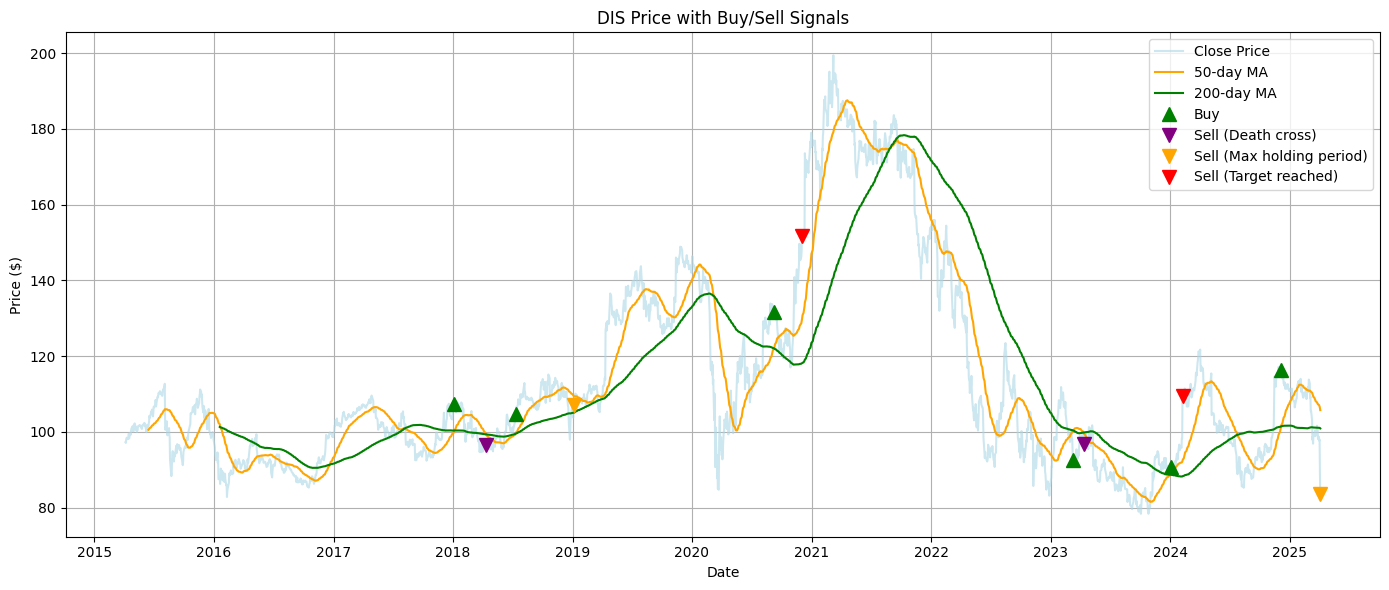


===== Trading Strategy Results for SBUX (Golden + Death Cross + RSI) =====
Total Trades: 5
Winning Trades: 4 (80.00%)
Losing Trades: 1
Average Profit: 10.31%
Sell Reasons: Target=4, DeathCross=1, MaxHold=0


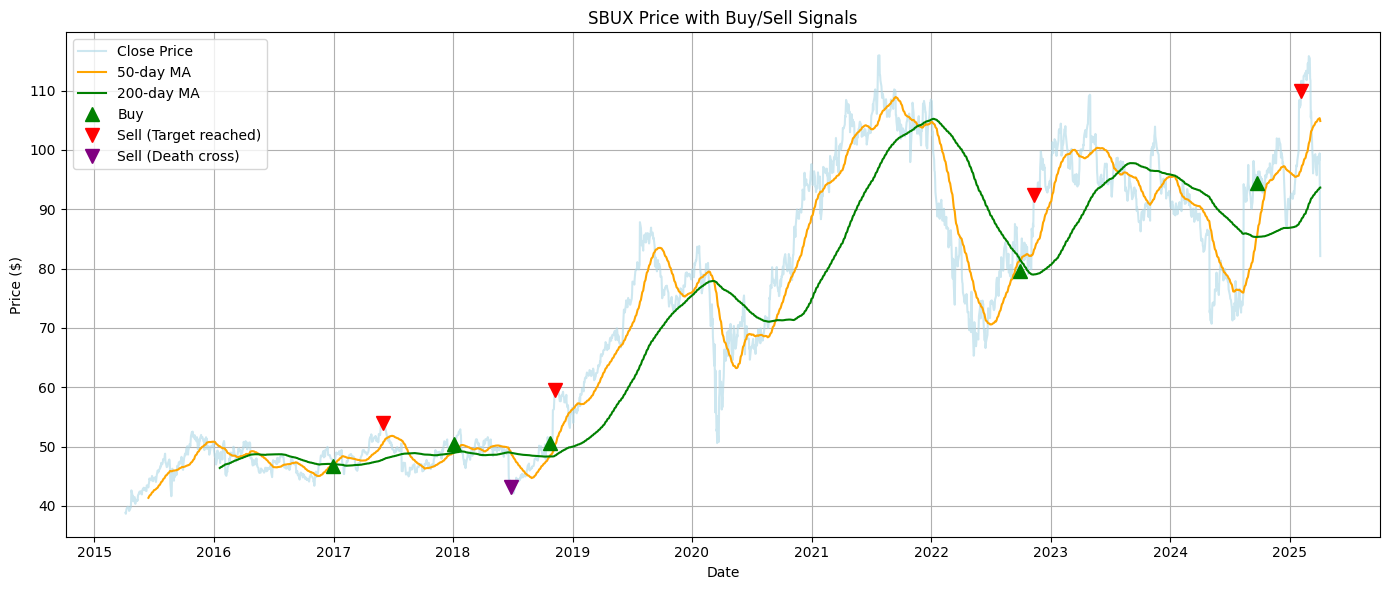


===== Trading Strategy Results for WMT (Golden + Death Cross + RSI) =====
Total Trades: 5
Winning Trades: 5 (100.00%)
Losing Trades: 0
Average Profit: 9.36%
Sell Reasons: Target=2, DeathCross=0, MaxHold=3


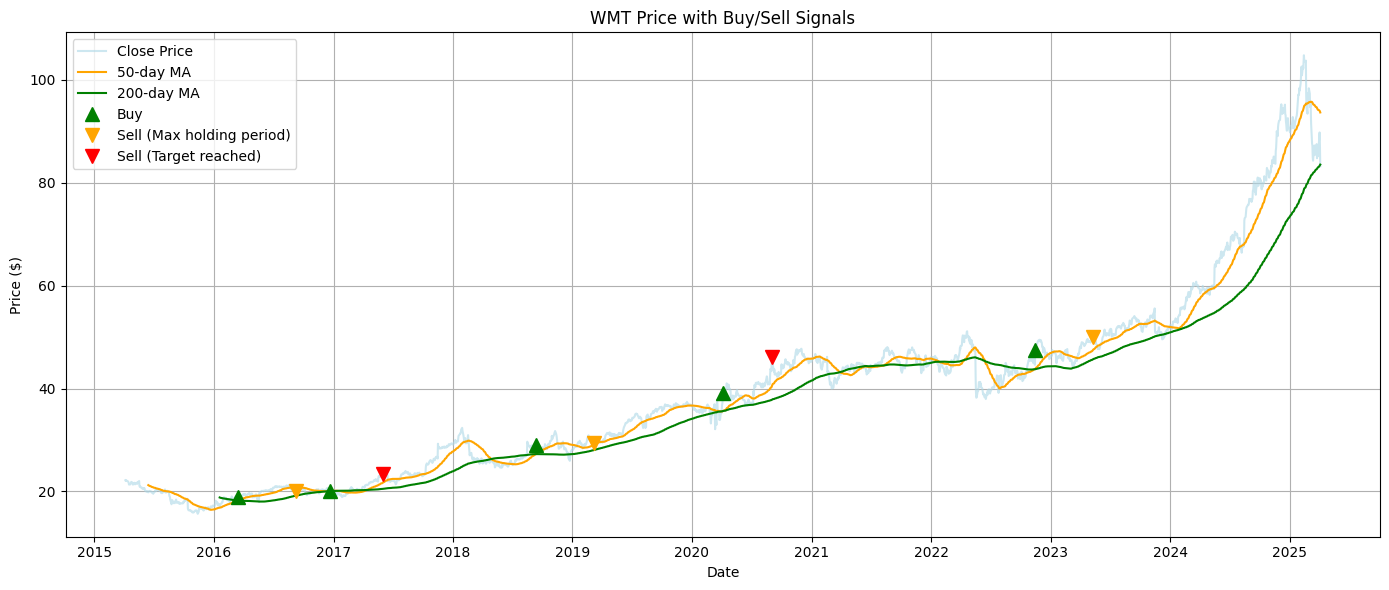


===== Trading Strategy Results for NFLX (Golden + Death Cross + RSI) =====
Total Trades: 5
Winning Trades: 4 (80.00%)
Losing Trades: 1
Average Profit: 10.46%
Sell Reasons: Target=4, DeathCross=1, MaxHold=0


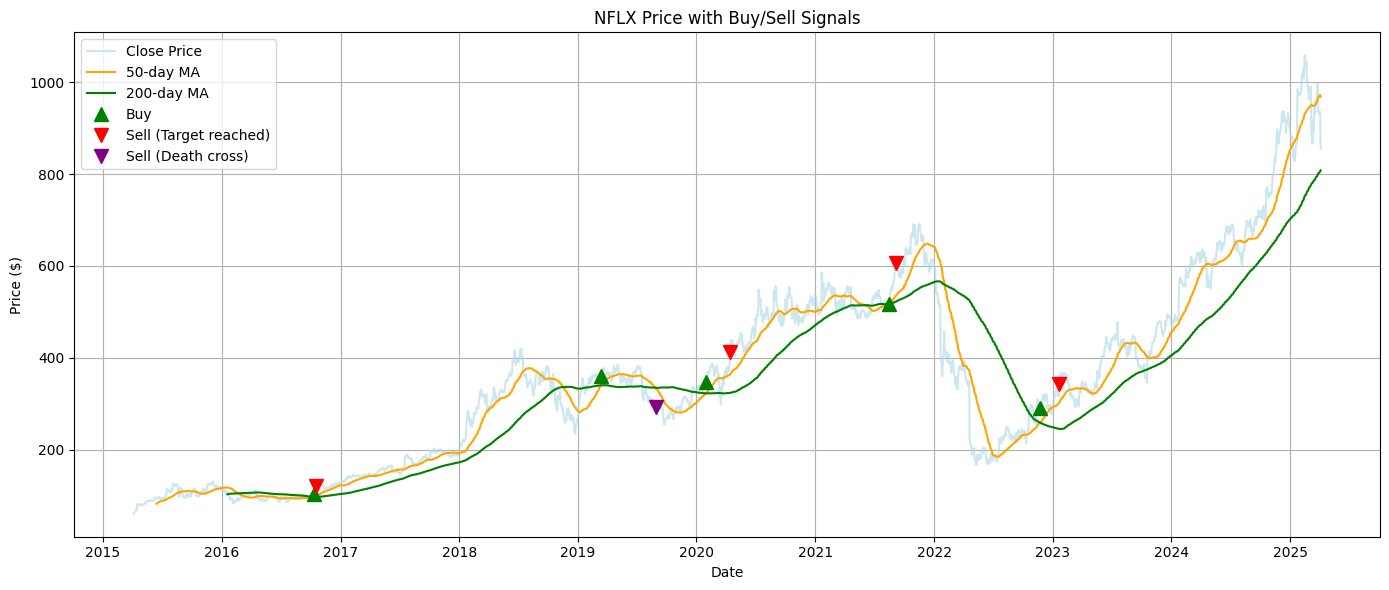


===== Trading Strategy Results for MCD (Golden + Death Cross + RSI) =====
Total Trades: 7
Winning Trades: 4 (57.14%)
Losing Trades: 3
Average Profit: -0.62%
Sell Reasons: Target=2, DeathCross=3, MaxHold=2


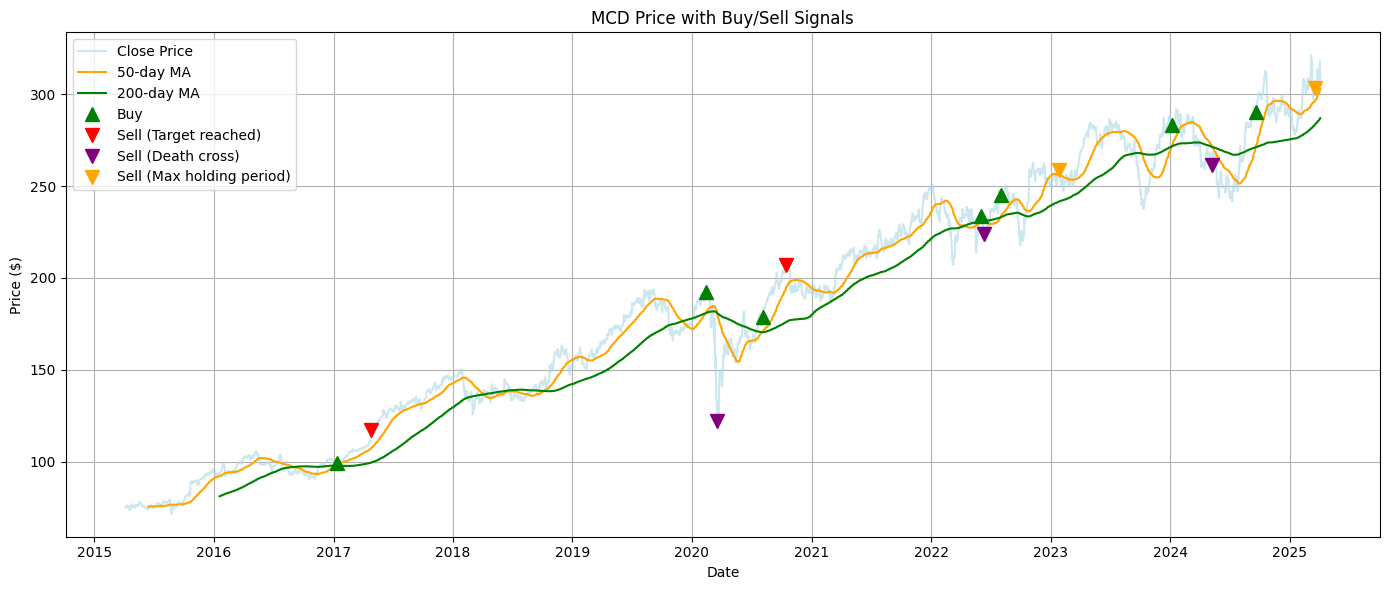


===== Trading Strategy Results for JPM (Golden + Death Cross + RSI) =====
Total Trades: 2
Winning Trades: 2 (100.00%)
Losing Trades: 0
Average Profit: 8.69%
Sell Reasons: Target=1, DeathCross=0, MaxHold=1


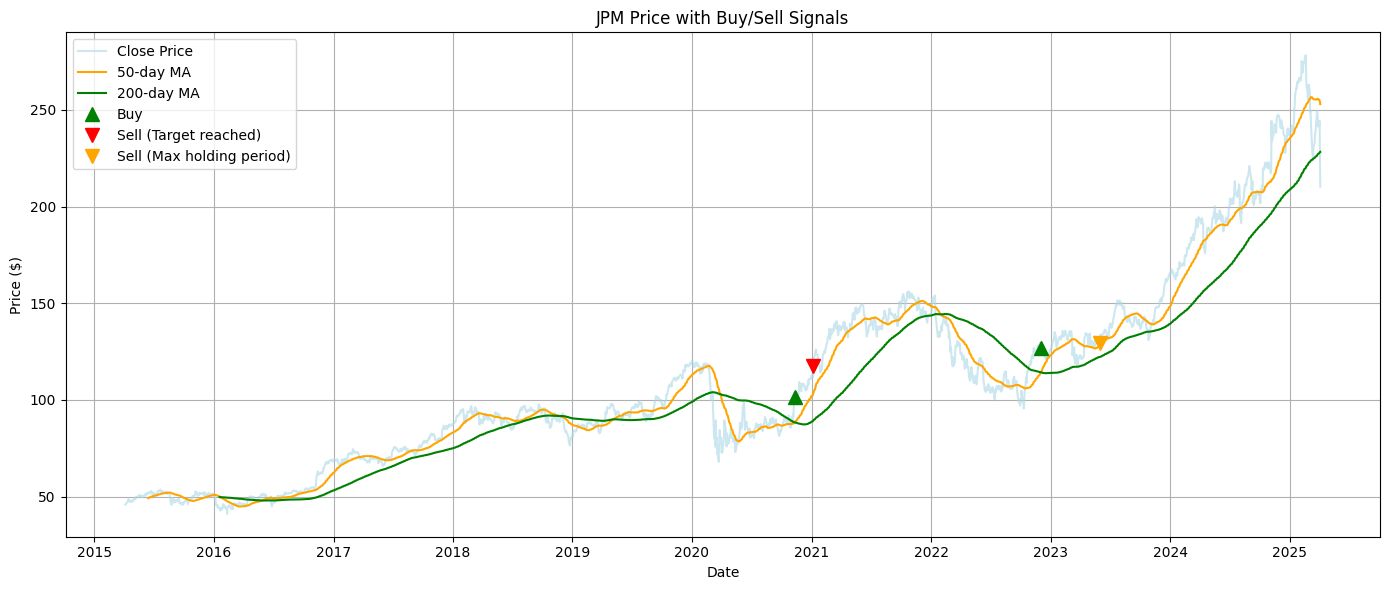


===== Trading Strategy Results for BA (Golden + Death Cross + RSI) =====
Total Trades: 4
Winning Trades: 3 (75.00%)
Losing Trades: 1
Average Profit: 5.18%
Sell Reasons: Target=3, DeathCross=0, MaxHold=1


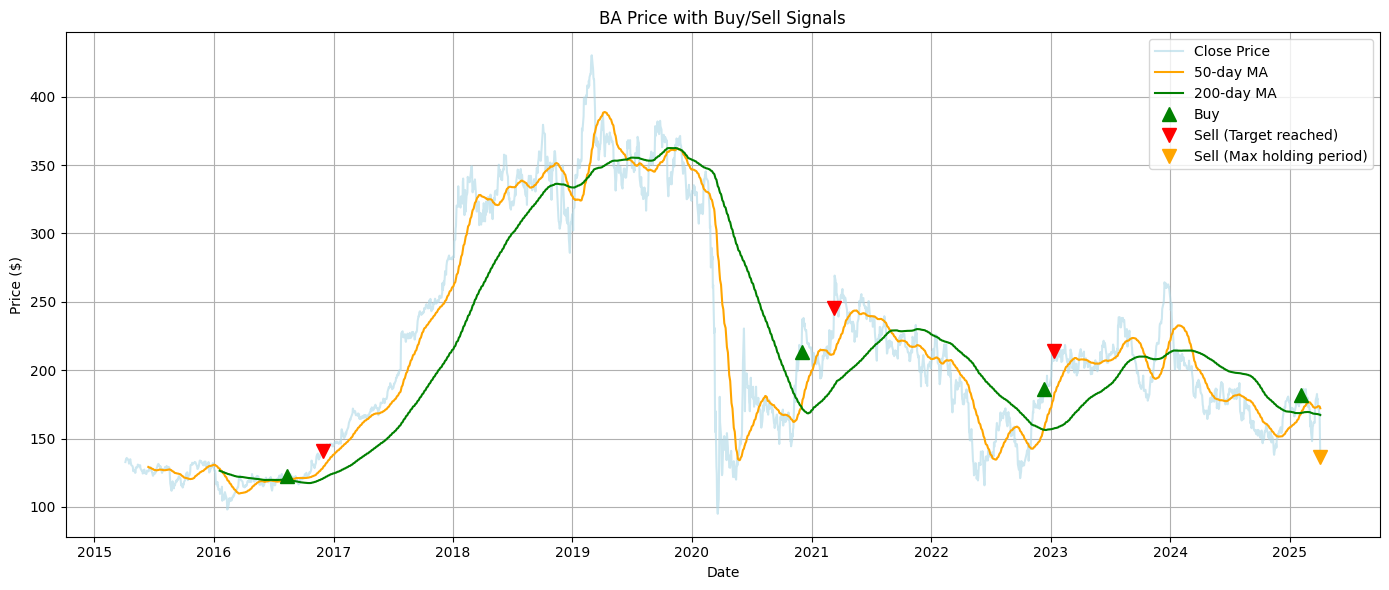


===== Trading Strategy Results for INTC (Golden + Death Cross + RSI) =====
Total Trades: 6
Winning Trades: 5 (83.33%)
Losing Trades: 1
Average Profit: 9.62%
Sell Reasons: Target=4, DeathCross=0, MaxHold=2


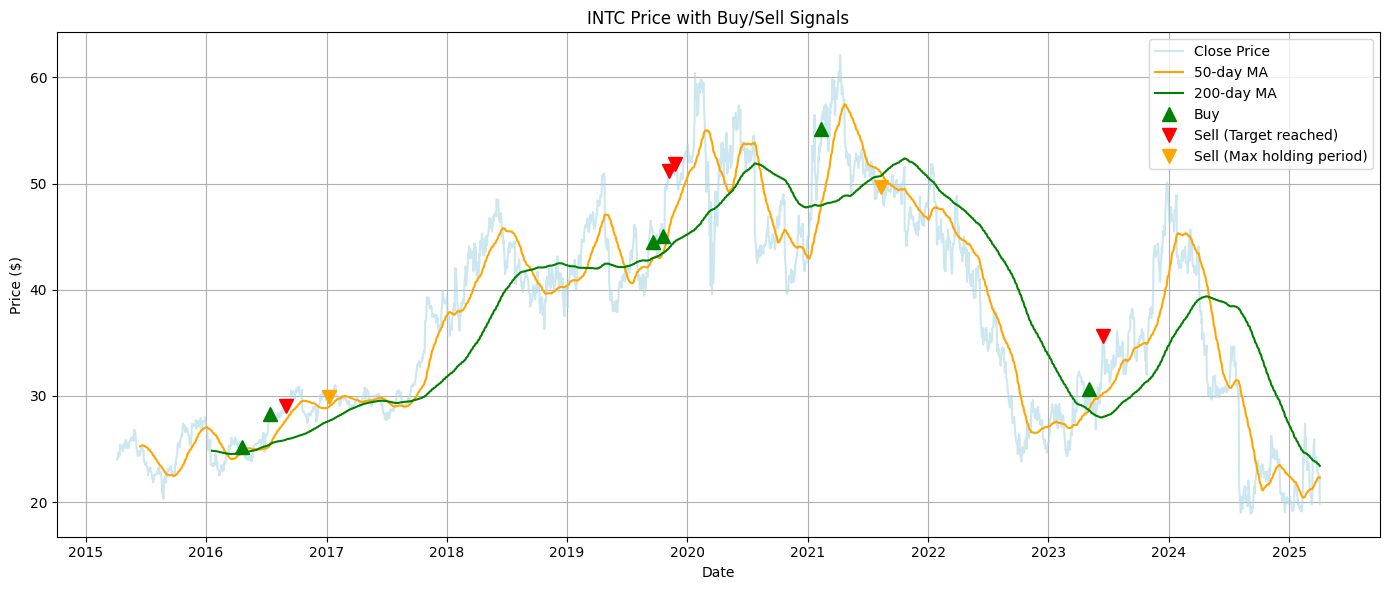


===== Trading Strategy Results for V (Golden + Death Cross + RSI) =====
Total Trades: 3
Winning Trades: 3 (100.00%)
Losing Trades: 0
Average Profit: 11.23%
Sell Reasons: Target=1, DeathCross=0, MaxHold=2


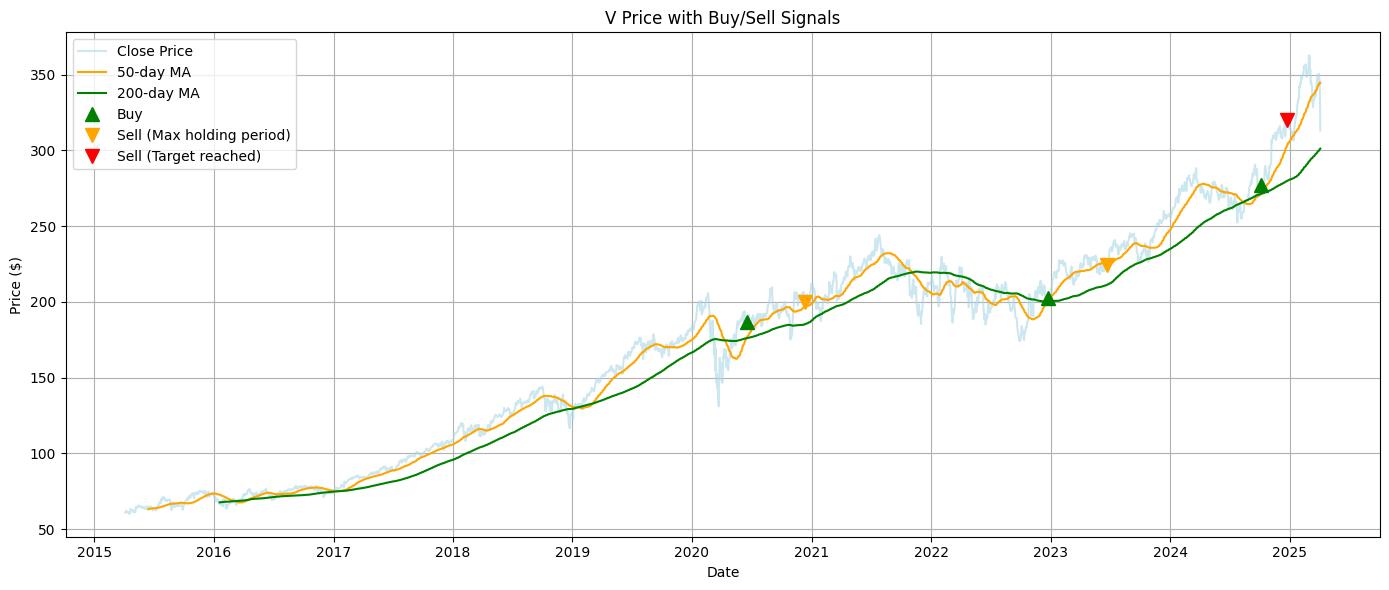


===== Trading Strategy Results for PG (Golden + Death Cross + RSI) =====
Total Trades: 4
Winning Trades: 3 (75.00%)
Losing Trades: 1
Average Profit: 2.24%
Sell Reasons: Target=0, DeathCross=0, MaxHold=4


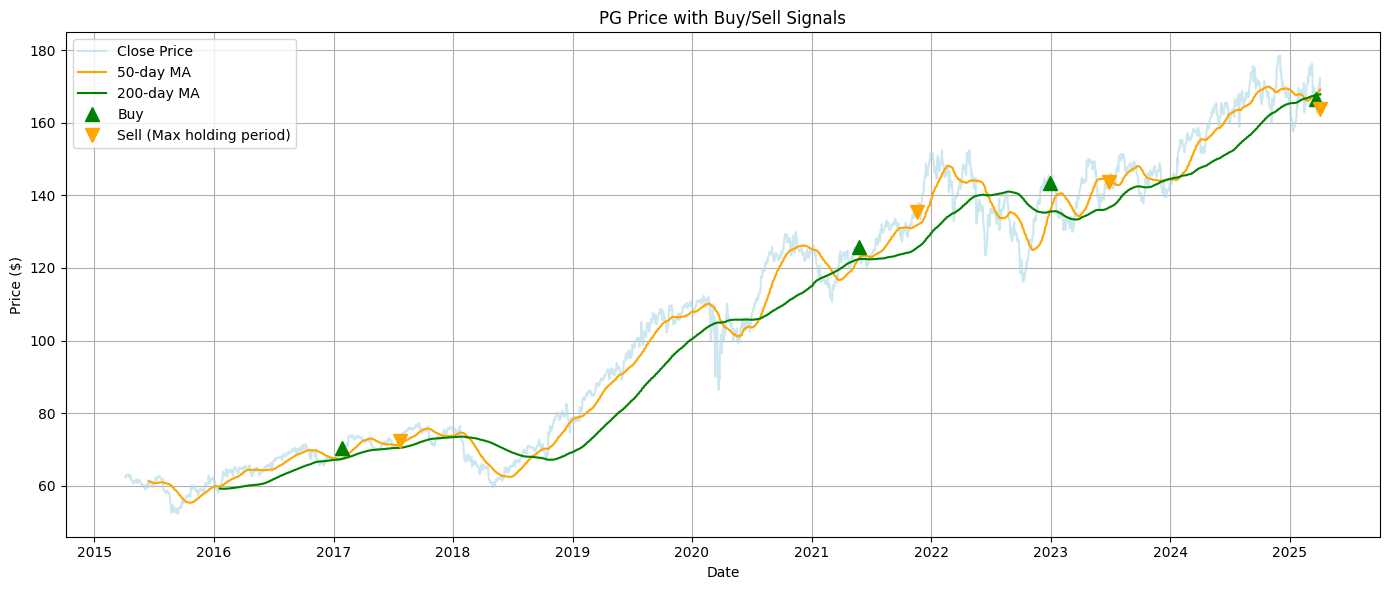


===== Trading Strategy Results for UNH (Golden + Death Cross + RSI) =====
Total Trades: 1
Winning Trades: 1 (100.00%)
Losing Trades: 0
Average Profit: 15.24%
Sell Reasons: Target=1, DeathCross=0, MaxHold=0


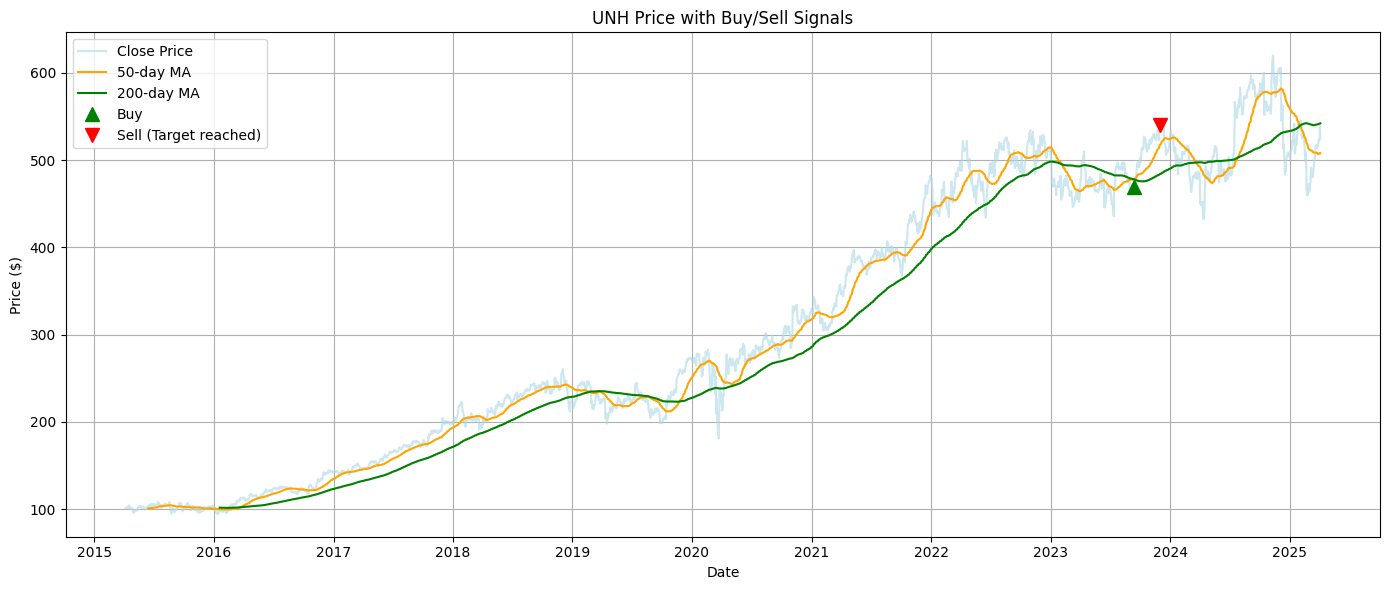


===== Trading Strategy Results for PEP (Golden + Death Cross + RSI) =====
Total Trades: 4
Winning Trades: 3 (75.00%)
Losing Trades: 1
Average Profit: 3.61%
Sell Reasons: Target=0, DeathCross=0, MaxHold=4


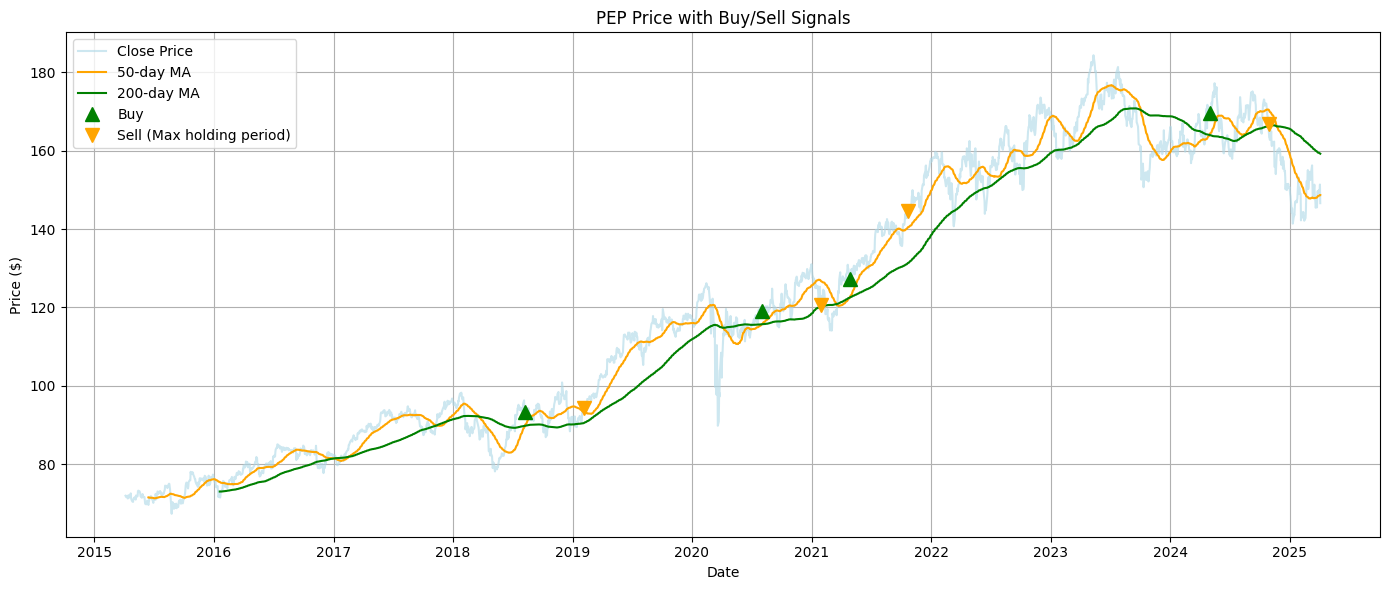


===== Trading Strategy Results for BAC (Golden + Death Cross + RSI) =====
Total Trades: 4
Winning Trades: 2 (50.00%)
Losing Trades: 2
Average Profit: -5.14%
Sell Reasons: Target=0, DeathCross=3, MaxHold=1


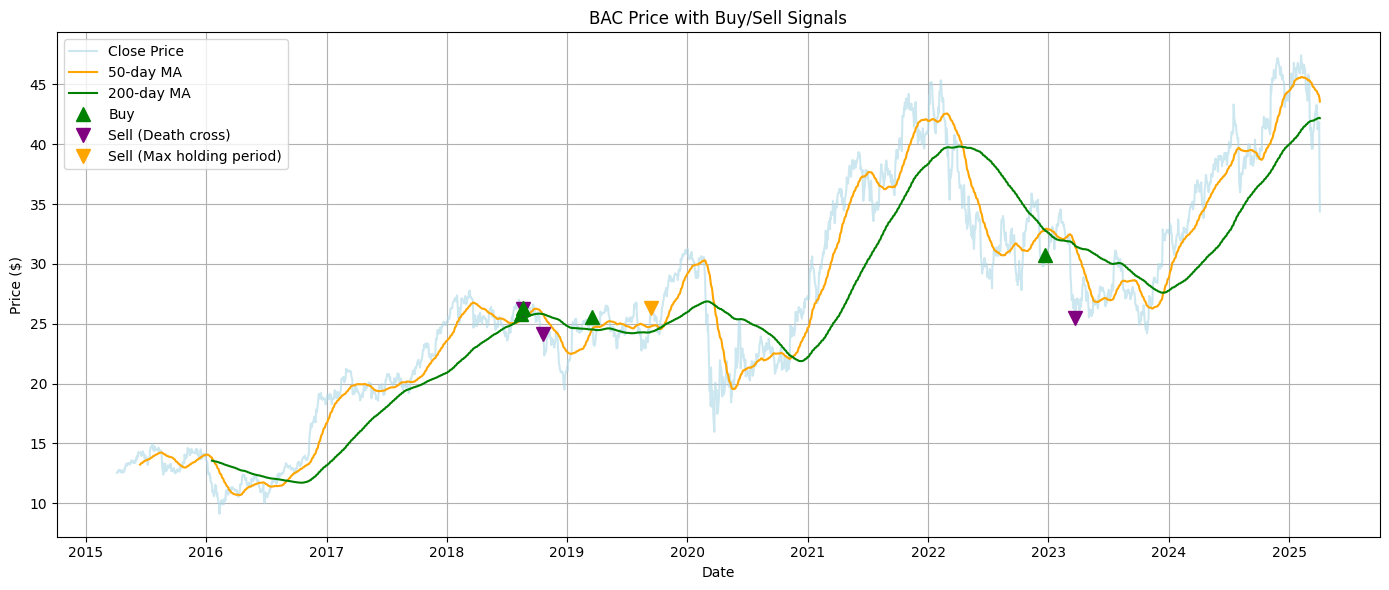


===== Trading Strategy Results for MRK (Golden + Death Cross + RSI) =====
Total Trades: 2
Winning Trades: 1 (50.00%)
Losing Trades: 1
Average Profit: 3.03%
Sell Reasons: Target=1, DeathCross=1, MaxHold=0


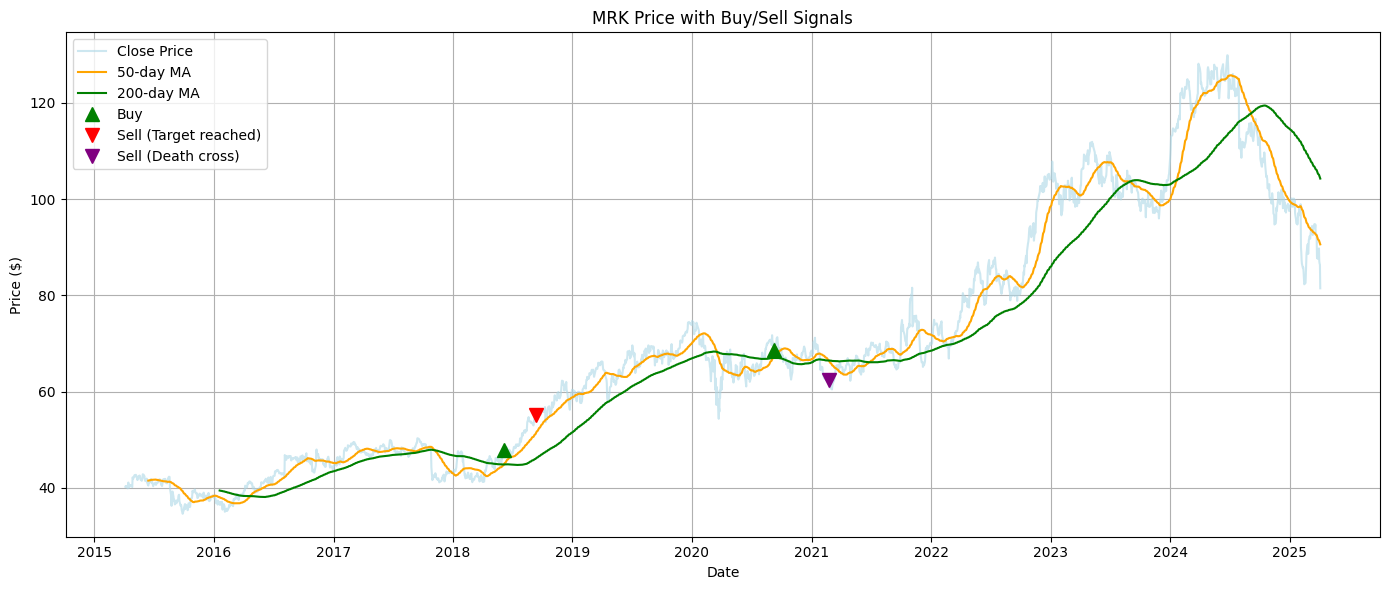


===== Trading Strategy Results for ABBV (Golden + Death Cross + RSI) =====
Total Trades: 3
Winning Trades: 3 (100.00%)
Losing Trades: 0
Average Profit: 15.61%
Sell Reasons: Target=3, DeathCross=0, MaxHold=0


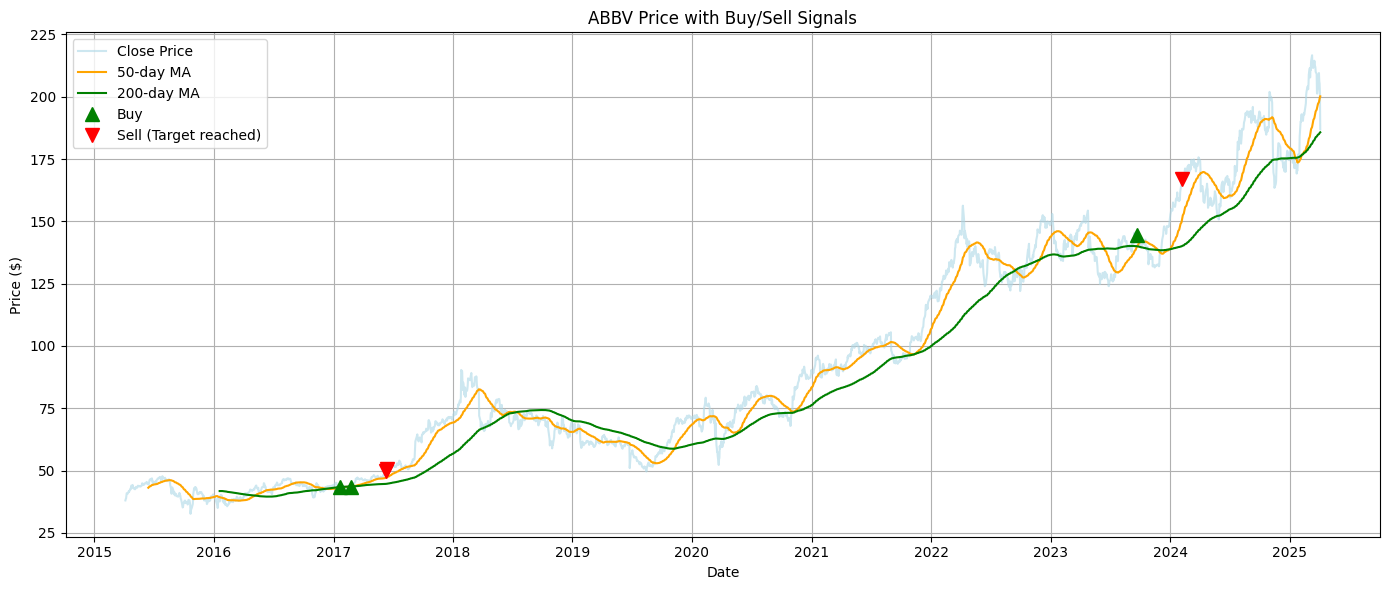


===== Trading Strategy Results for HON (Golden + Death Cross + RSI) =====
Total Trades: 7
Winning Trades: 4 (57.14%)
Losing Trades: 3
Average Profit: 6.41%
Sell Reasons: Target=4, DeathCross=3, MaxHold=0


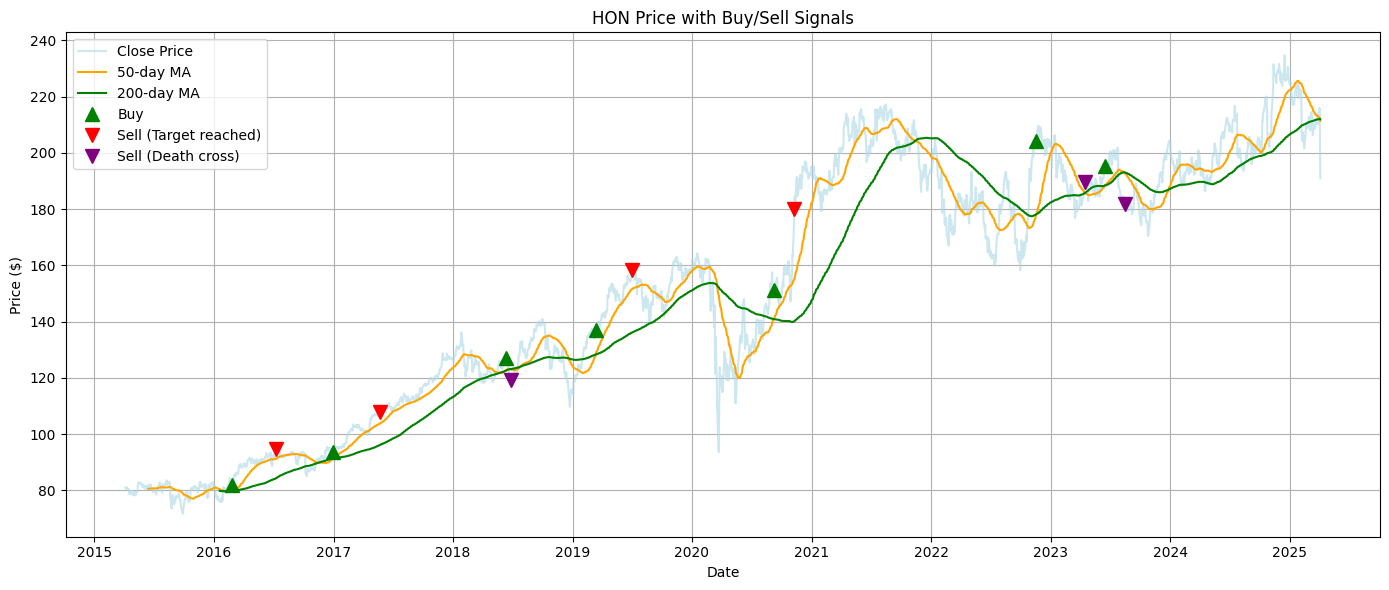


===== Trading Strategy Results for LIN (Golden + Death Cross + RSI) =====
Total Trades: 6
Winning Trades: 4 (66.67%)
Losing Trades: 2
Average Profit: 5.40%
Sell Reasons: Target=2, DeathCross=1, MaxHold=3


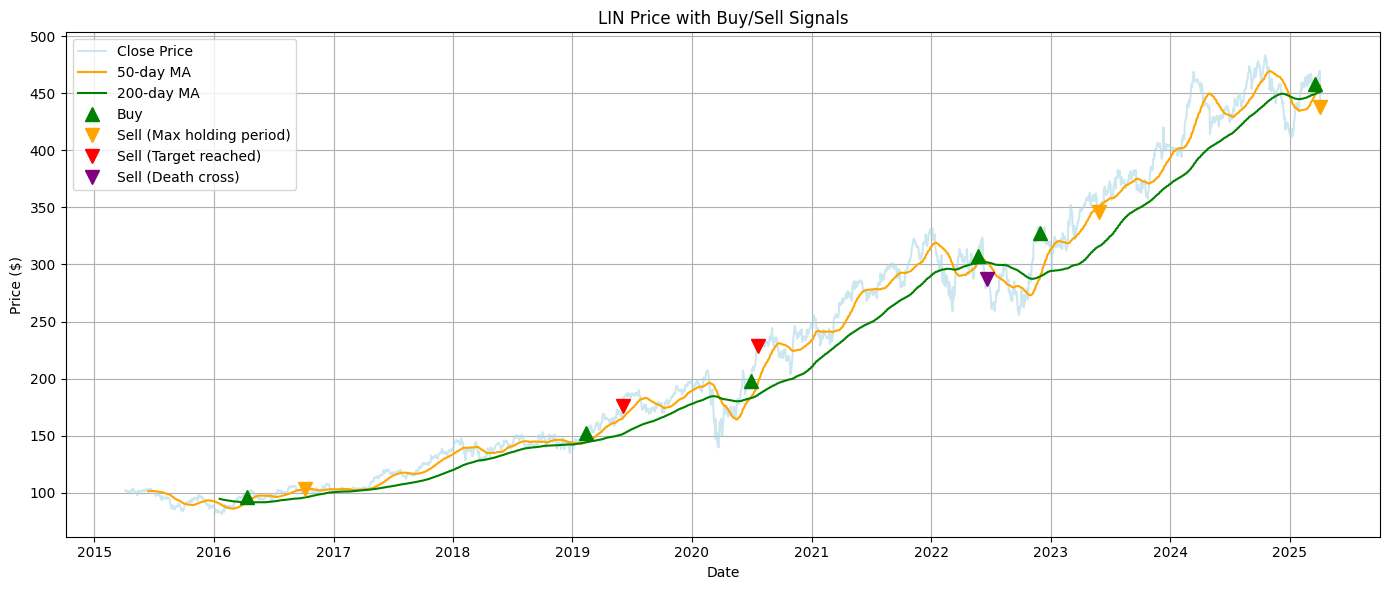


===== Trading Strategy Results for PM (Golden + Death Cross + RSI) =====
Total Trades: 10
Winning Trades: 3 (30.00%)
Losing Trades: 7
Average Profit: -0.63%
Sell Reasons: Target=2, DeathCross=5, MaxHold=3


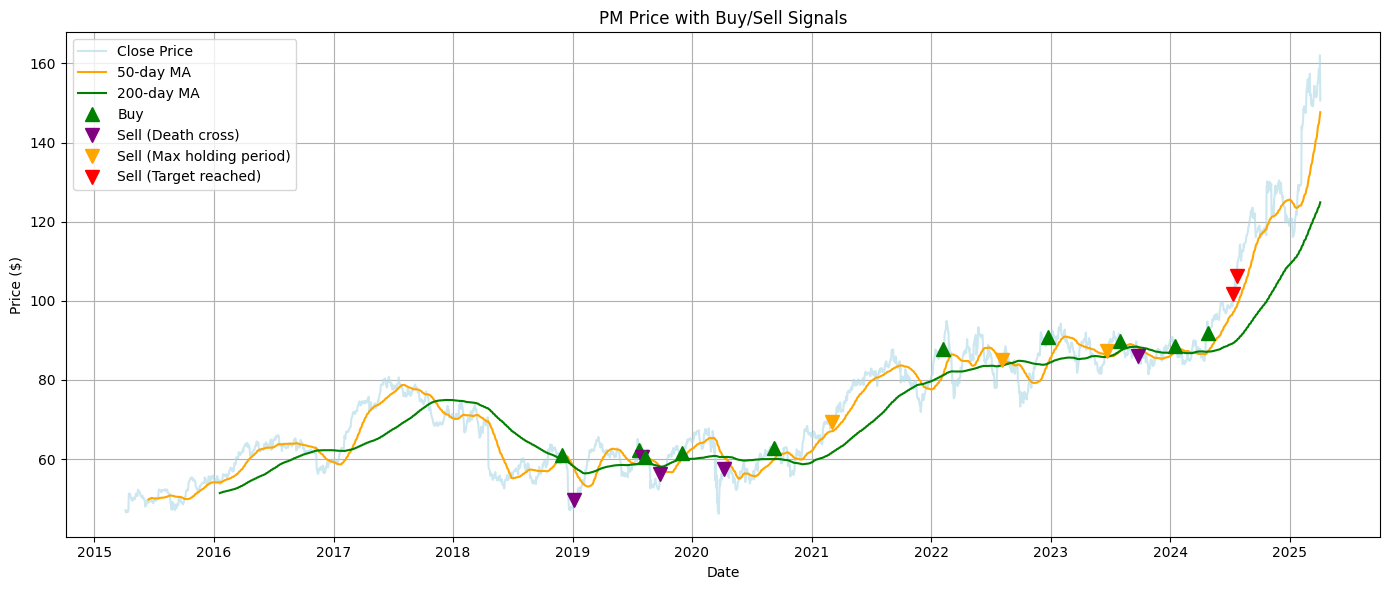


===== Trading Strategy Results for C (Golden + Death Cross + RSI) =====
Total Trades: 4
Winning Trades: 1 (25.00%)
Losing Trades: 3
Average Profit: -1.27%
Sell Reasons: Target=1, DeathCross=3, MaxHold=0


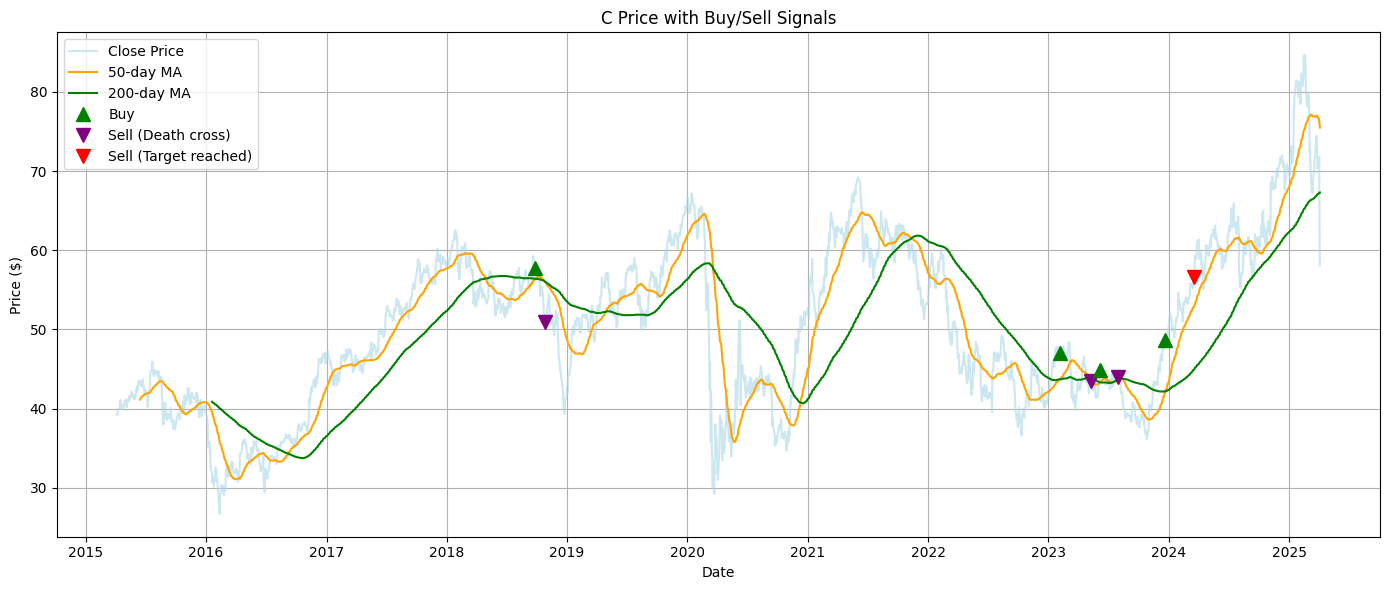


===== Summary Across All Tickers =====
Total Trades        : 88
Profitable Trades   : 59
Win Rate (%)        : 67.05
Average Profit (%)  : 12.02
Avg Holding (days)  : 107

Detailed Trades for All Tickers:
                    BuyDate    BuyPrice                  SellDate   SellPrice  HoldingDays  ProfitPct  ProfitDollar          SellReason Ticker
0 2018-01-05 00:00:00-05:00  107.226364 2018-04-12 00:00:00-04:00   96.438408           96 -10.060918    -10.787956         Death cross    DIS
1 2018-07-11 00:00:00-04:00  104.621559 2019-01-04 00:00:00-05:00  106.965195          177   2.240108      2.343636  Max holding period    DIS
2 2020-09-09 00:00:00-04:00  131.732635 2020-12-02 00:00:00-05:00  151.735519           84  15.184456     20.002884      Target reached    DIS
3 2023-03-10 00:00:00-05:00   92.428177 2023-04-12 00:00:00-04:00   96.744850           32   4.670300      4.316673         Death cross    DIS
4 2024-01-03 00:00:00-05:00   90.826660 2024-02-08 00:00:00-05:00  109.546959  

In [90]:
positions = main()

if not positions.empty:
    print("\nDetailed Trades for All Tickers:")
    print(positions.to_string())
else:
    print("\nNo trades were generated for any of the tickers.")

#### This strategy increases the probability that a confirmed trade is made during a true pullback or early trend reversa; Help prevent trades during overly extended or overheated moves

## Question 4

In [119]:
def get_stock_data(ticker, interval="5m", days=60):
    stock = yf.Ticker(ticker)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days)
    data = stock.history(start=start_date, end=end_date, interval=interval)
    data['Datetime'] = data.index
    return data

# Add the Relative Strength Index indicator
def add_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    return data

# Trading strategy based on RSI
def implement_hft_strategy(data):
    trades = []
    max_hold = pd.Timedelta(days=2)  # Maximum holding period: 2 days

    # Signal: Buy when RSI < 30
    buy_signals = data[data['RSI'] < 30]

    for buy_time in buy_signals.index:
        buy_price = data.loc[buy_time, 'Close']
        sell_deadline = buy_time + max_hold

        # Define the sell window (after buy, up to max holding time)
        sell_window = data[(data.index > buy_time) & (data.index <= sell_deadline)]
        sell_signal = sell_window[sell_window['RSI'] > 70]  # Sell early if RSI > 70

        if not sell_signal.empty:
            sell_time = sell_signal.index[0]
            sell_price = sell_signal.loc[sell_time, 'Close']
            sell_reason = "RSI>70"
        elif not sell_window.empty:
            sell_time = sell_window.index[-1]
            sell_price = sell_window.iloc[-1]['Close']
            sell_reason = "MaxHold"
        else:
            continue  # If no data available in the sell window

        holding_period = sell_time - buy_time
        profit_pct = (sell_price / buy_price - 1) * 100

        trades.append({
            'BuyTime': buy_time,
            'BuyPrice': buy_price,
            'SellTime': sell_time,
            'SellPrice': sell_price,
            'HoldingPeriod': holding_period,
            'ProfitPct': profit_pct,
            'SellReason': sell_reason
        })

    return pd.DataFrame(trades)


def summarize_trades(trades):
    print("\n===== Strategy Summary for INTC (HFT RSI-based) =====")
    if trades.empty:
        print("No trades were made.")
        return

    print(f"Total Trades: {len(trades)}")
    print(f"Profitable Trades: {(trades['ProfitPct'] > 0).sum()}")
    print(f"Avg Profit (%): {trades['ProfitPct'].mean():.2f}")
    print(f"Avg Holding Time: {trades['HoldingPeriod'].mean()}")


def plot_trades(data, trades):
    # Add EMA50 and EMA200 for trend visualization
    data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
    data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()

    plt.figure(figsize=(16, 6))
    plt.plot(data['Datetime'], data['Close'], label='Close Price', color='lightblue', linewidth=1)
    plt.plot(data['Datetime'], data['EMA50'], label='EMA50', color='orange', linewidth=1)
    plt.plot(data['Datetime'], data['EMA200'], label='EMA200', color='green', linewidth=1)

    for _, trade in trades.iterrows():
        plt.scatter(trade['BuyTime'], trade['BuyPrice'], color='green', marker='^', s=100,
                    label='Buy' if 'Buy' not in plt.gca().get_legend_handles_labels()[1] else "")
        
        if trade['SellReason'] == "RSI>70":
            plt.scatter(trade['SellTime'], trade['SellPrice'], color='red', marker='v', s=100,
                        label='Sell (Target reached)' if 'Sell (Target reached)' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(trade['SellTime'], trade['SellPrice'], color='orange', marker='v', s=100,
                        label='Sell (Max holding period)' if 'Sell (Max holding period)' not in plt.gca().get_legend_handles_labels()[1] else "")

    plt.title("INTC Price with Buy/Sell Signals")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def main():
    ticker = 'INTC'
    data = get_stock_data(ticker)
    data = add_rsi(data)
    trades = implement_hft_strategy(data)
    summarize_trades(trades)
    plot_trades(data, trades)


===== Strategy Summary for INTC (HFT RSI-based) =====
Total Trades: 448
Profitable Trades: 316
Avg Profit (%): 0.24
Avg Holding Time: 0 days 07:53:38.303571428


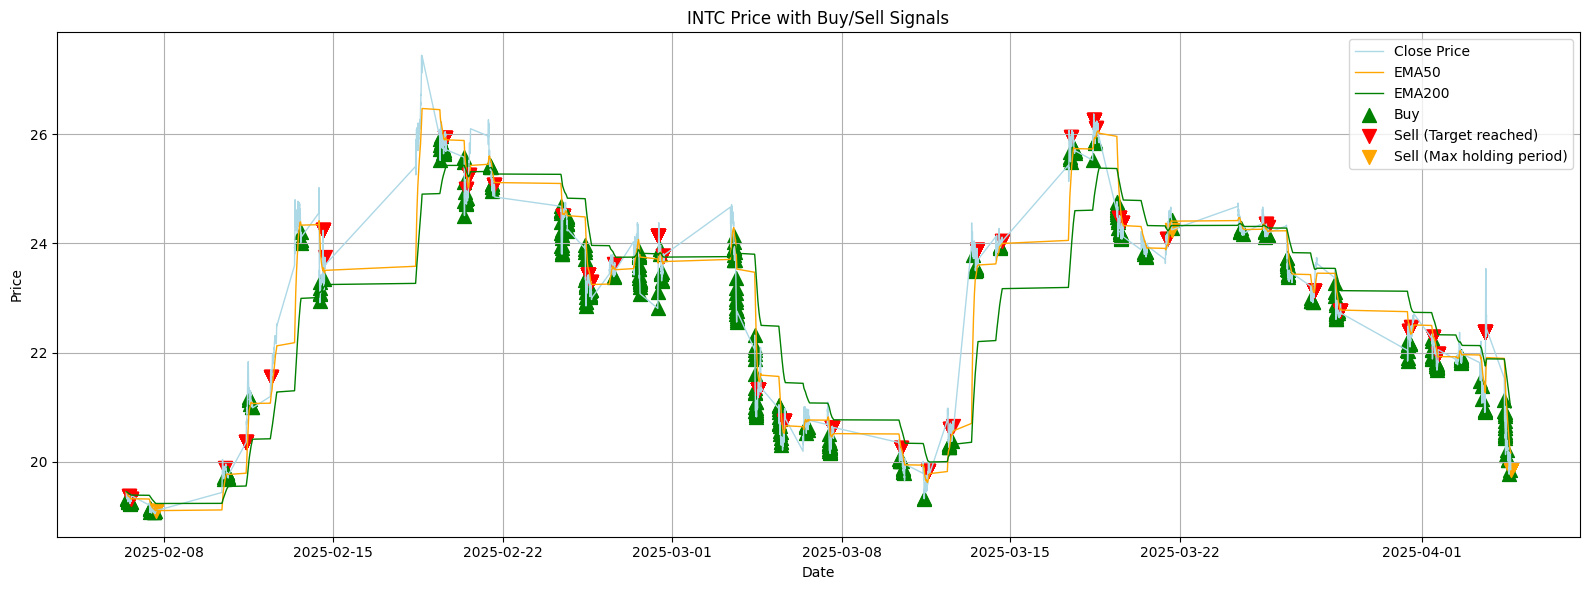

In [120]:
main()

#### This strategy is effective at capturing short-term oversold/overbought reversals, with a strong win rate, but relatively small average profits per trade, typical for high-frequency trading